In [3]:
 def extract(dictionary,key):
    try:
        return dictionary[key]
    except:
        return np.nan

In [4]:
def trypull(list):
    try:
        return list[0]
    except:
        return np.nan

In [5]:
def bigactors(actors):
    actor_list = [i[0] for i in prolific]   
    count = 0
    for i in actors:
        if i in actor_list:
            count+=1
    return count

In [6]:
def bigdirectors(director):
    dir_list = [i[0] for i in prolific]
    count = 0
    if director in dir_list:
        count+=1
    return count

In [7]:
def convert_ytdate(dstring):
    try:
        if dstring.find('days') > -1:
            return round(int(dstring.split(' ')[0]))
        elif dstring.find('months') > -1:
            d = int(dstring.split(' ')[0])
            return round(int(d*4.333*7))
        elif dstring.find('weeks') > -1:
            d = int(dstring.split(' ')[0])
            return round(int(d*7))
        elif dstring.find('years') > -1:
            d = int(dstring.split(' ')[0])
            return round(int(d*52*7))
        else: return np.nan
    except:
        return np.nan

In [8]:
def append_crew(cast):
    for i in cast:
        try: castlist[i] += 1
        except: castlist[i] = 1


In [9]:
def append_dir(director):
    try: dirlist[director]+=1
    except: dirlist[director] = 1

In [10]:
def rating_clean(rating):
    try:
        
        if rating[0] in ('n', 'M/PG', 'Open'):
            return np.nan
        else:
            return rating[0]
    except:
        return np.nan

In [11]:
def split_rating(rating):
    try:
        return int(rating.split('%')[0])
    except:
        return np.nan

In [12]:
def ytviews(views):
    try:
        return int(views.split(' ')[0].replace(',',''))
    except:
        return np.nan

In [13]:
def internationalcount(x):
    try: return len(x)
    except: return np.nan

In [34]:
import pandas as pd
import numpy as np
with open('movies.json') as f:
    df = pd.read_json(f)

cleaned = df.drop(['runtime','prodCountries','prodCompanies','keywords','comps','domesticReleases'], axis = 1)


cleaned['critics'] = cleaned['critics'].apply(lambda x: split_rating(x))
cleaned['audience'] = cleaned['audience'].apply(lambda x: split_rating(x))
cleaned['creative'] = cleaned['creative'].apply(lambda x: trypull(x))
cleaned['firstviews'] = cleaned['firstviews'].apply(lambda x: ytviews(x))
cleaned['firstdate'] = cleaned['firstdate'].apply(lambda x: convert_ytdate(x))
cleaned['genre'] = cleaned['genre'].apply(lambda x: trypull(x))
cleaned['budget'] = cleaned['budget'].apply(lambda x: int(x.replace(',','').replace('$','')))
cleaned['source'] = cleaned['source'].apply(lambda x: trypull(x))


cleaned['director'] = cleaned['crew'].apply(lambda x: extract(x, 'Director'))
cleaned['producer'] = cleaned['crew'].apply(lambda x: extract(x, 'Producer'))
cleaned['execprod'] = cleaned['crew'].apply(lambda x: extract(x,'Executive Producer'))
cleaned['scrwriter'] = cleaned['crew'].apply(lambda x: extract(x, 'Screenwriter'))

cleaned['released']  = pd.to_datetime(cleaned['released'], format='%m/%d/%Y')
cleaned = cleaned[(cleaned['released'].dt.year >= 2013)]
cleaned['released'] = cleaned['released'].dt.quarter
cleaned['cast'] = cleaned['cast'].apply(lambda x: x.values())
cleaned['rating'] = cleaned['mpaaRating'].apply(lambda x: trypull(x))
cleaned['domestic'] = cleaned['domestic'].apply(lambda x: int(x.replace('$','').replace(',','')))
cleaned['worldwide'] = cleaned['worldwide'].apply(lambda x: int(x.replace('$','').replace(',','')))
cleaned['results'] = cleaned['results'].apply(lambda x: int(x.replace(',','')))
cleaned['franchise'] = cleaned['franchise'].apply(lambda x: internationalcount(x))
cleaned['mpaaRating'] = cleaned['mpaaRating'].apply(lambda x: rating_clean(x))
cleaned['internationalReleases'] = cleaned['internationalReleases'].apply(lambda x: internationalcount(x))


In [35]:
gendummies = pd.get_dummies(cleaned['genre'], drop_first=True)
ratdummies = pd.get_dummies(cleaned['mpaaRating'],drop_first=True)
creatdummies = pd.get_dummies(cleaned['creative'], drop_first=True)
datdummies = pd.get_dummies(cleaned['released'], drop_first = True)
print type(gendummies), type(ratdummies), type(creatdummies),type(cleaned)
cleaned = pd.concat([cleaned, gendummies, ratdummies, creatdummies, datdummies], axis = 1)



<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [36]:
castlist = {}
castbymov = []
cleaned['cast'].apply(lambda x: append_crew(x));
for k,v in castlist.iteritems():
    tupe = (k,v)
    castbymov.append(tupe)
prolific = sorted(castbymov, key=lambda tup: tup[1], reverse=True)[:100]
cleaned['cast'] = cleaned['cast'].apply(lambda x:bigactors(x))

In [37]:
dirlist = {}
dirbymov = []
cleaned['director'].apply(lambda x: append_dir(x))
for k,v in dirlist.iteritems():
    tupe = (k,v)
    dirbymov.append(tupe)
prolific = sorted(dirbymov, key = lambda tup: tup[1], reverse = True)[:50]
cleaned['director'] = cleaned['director'].apply(lambda x:bigdirectors(x))


In [38]:
dirlist = {}
execbymov = []
cleaned['execprod'].apply(lambda x: append_dir(x))
for k,v in dirlist.iteritems():
    tupe = (k,v)
    execbymov.append(tupe)
prolific = sorted(execbymov, key = lambda tup: tup[1], reverse = True)[:25]
cleaned['execprod'] = cleaned['execprod'].apply(lambda x:bigdirectors(x))


In [39]:
dirlist = {}
producer = []
cleaned['producer'].apply(lambda x: append_dir(x))
for k,v in dirlist.iteritems():
    tupe = (k,v)
    producer.append(tupe)
prolific = sorted(producer, key = lambda tup: tup[1], reverse = True)[:25]
cleaned['producer'] = cleaned['producer'].apply(lambda x:bigdirectors(x))

In [40]:
dirlist = {}
screen = []
cleaned['scrwriter'].apply(lambda x: append_dir(x))
for k,v in dirlist.iteritems():
    tupe = (k,v)
    producer.append(tupe)
prolific = sorted(producer, key = lambda tup: tup[1], reverse = True)[:25]
cleaned['scrwriter'] = cleaned['scrwriter'].apply(lambda x:bigdirectors(x))

In [41]:
cleaned['origscreen'] = cleaned['source'].apply(lambda x: int(x=='Original Screenplay'))
to_model = cleaned.drop(['crew','source','mpaaRating','production','released','rank','genre','critics','audience','Multiple Creative Types','title','franchise','Concert/Performance','creative','rating','crew','internationalReleases'], axis = 1)

In [42]:
to_model = to_model.fillna(to_model.mean())

In [43]:
cleaned[cleaned['genre'] == 'Adventure'][['title','cast','budget','worldwide']].sort_values('worldwide', ascending = False)

,title,cast,budget,worldwide
11,Star Wars Ep. VII: The Force Awakens,3,306000000,2058662225
5062,Frozen,0,150000000,1274234980
5061,Zootopia,4,150000000,1021768248
5143,Finding Dory,3,200000000,985205113
5158,The Hobbit: The Desolation of Smaug,1,250000000,960366855
5157,The Hobbit: The Battle of the Five Armies,1,250000000,955119788
4989,The Hunger Games: Catching Fire,5,130000000,864868047
5105,Inside Out,2,175000000,853923085
4655,The Secret Life of Pets,3,75000000,833731360
5094,Guardians of the Galaxy,4,170000000,771172112


#### need to figure out how to handle producer, screenwriter, director, executiveproducer, & firstdate

In [44]:
import pandas as pd
import numpy as np
import math
from sklearn import cross_validation, linear_model, grid_search
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


def scatter_matrix(X):
    feature_count = len(X.columns)
    fig,ax = plt.subplots(ncols=feature_count,nrows=feature_count,figsize=(10*feature_count, 10*feature_count))

    for i,feature_i in enumerate(X):
        for j,feature_j in enumerate(X):
            ax[i][j].scatter(X[feature_i],X[feature_j])
            ax[i][j].set_xlabel('Feature ' + str(feature_i))
            ax[i][j].set_ylabel('Feature ' + str(feature_j))


In [55]:
X,y = to_model[['budget','cast','firstviews']],to_model['worldwide']

X_train,X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.3)



In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
from sklearn import cross_validation, datasets, linear_model, grid_search, tree, preprocessing
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,  RandomForestRegressor,  ExtraTreesClassifier
from sklearn.cross_validation import KFold

%matplotlib inline

In [57]:
kf = KFold(len(X_train), n_folds=20, shuffle=True, random_state=0)


In [58]:
lasso = linear_model.Lasso()

parameters = {'normalize':(True,False),
              'alpha':np.logspace(-1,30,50)}
grid_searcher = grid_search.GridSearchCV(lasso, parameters, cv=kf)

X_train,X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.3)

grid_searcher.fit(X_train, y_train)


model = grid_searcher.best_estimator_
print(grid_searcher.best_params_)
print 'coefficients', model.coef_
print 'score', grid_searcher.score(X_test, y_test)
zip(X_train.columns, model.coef_)



{'normalize': True, 'alpha': 910298.17799152271}
coefficients [  2.33640595e+00   2.69838393e+06   5.75849719e+00]
score 0.724118061932


[(u'budget', 2.3364059509079844),
 (u'cast', 2698383.9259054405),
 (u'firstviews', 5.7584971866717911)]

In [59]:
enet = linear_model.ElasticNet()

parameters = {'normalize':(True,False),
              'alpha':np.logspace(-2,30,50)}
grid_searcher = grid_search.GridSearchCV(enet, parameters, cv=kf)

grid_searcher.fit(X_train, y_train)

model = grid_searcher.best_estimator_
print(grid_searcher.best_params_)
print 'coefficients', zip(X.columns,model.coef_)
print 'score', grid_searcher.score(X_test, y_test)



{'normalize': False, 'alpha': 4.0949150623804229}
coefficients [(u'budget', 2.6102065676771744), (u'cast', 5705341.6323448597), (u'firstviews', 7.2729828310826621)]
score 0.733423317011


In [60]:
from sklearn.ensemble import RandomForestRegressor
import random
wrand = to_model.copy()
rng = [x for x in range(1, 6)]

for i in rng:
    col_name = 'RAND_' + str(i)
    wrand[col_name] = 1
    wrand[col_name] = wrand[col_name].map(lambda x: x * random.randint(0, 100))
    
wrand.columns
X,y = wrand[['budget','cast','firstviews']],wrand['worldwide']

X_train,X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.3)


In [62]:
rf =RandomForestRegressor(n_estimators = 150, max_features = 3 )
rf.fit(X_train,y_train)
print(sum(rf.feature_importances_))
a  = X.columns.values

1.0


In [63]:
sorted_features = zip(X.columns, rf.feature_importances_)
sorted_features.sort(key=lambda x: x[1], reverse=True)
for feature in sorted_features:
    print(feature)

(u'budget', 0.73317073458218929)
(u'firstviews', 0.22742048897728248)
(u'cast', 0.039408776440528051)


In [64]:
rf.score(X_test,y_test)


0.63751577559235595

In [82]:
import statsmodels.api as sm


In [83]:
X,y = to_model[['budget','firstviews','cast']],to_model['worldwide']



X_train,X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.3)

X_train = sm.add_constant(X_train)


In [84]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [85]:
results.params

const        -3.298371e+07
budget        2.722022e+00
firstviews    6.612505e+00
cast          9.689067e+06
dtype: float64

In [86]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              worldwide   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     492.5
Date:                Fri, 07 Oct 2016   Prob (F-statistic):          1.96e-166
Time:                        09:49:38   Log-Likelihood:                -13021.
No. Observations:                 650   AIC:                         2.605e+04
Df Residuals:                     646   BIC:                         2.607e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -3.298e+07   6.16e+06     -5.350      0.000     -4.51e+07 -2.09e+07
budget         2.7220      0.116     23.452      0.000         2.494     2.950
firstviews     6.6125      0.621     10.641      0.000         5.392     7.833
cast        9.689e+06   3.91e+06      2.477      0.013      2.01e+06  1.74e+07
==============================================================================
Omnibus:                      486.977   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18265.896
Skew:                           2.894   Prob(JB):                         0.00
Kurtosis:                      28.317   Cond. No.                     8.10e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import seaborn as sns

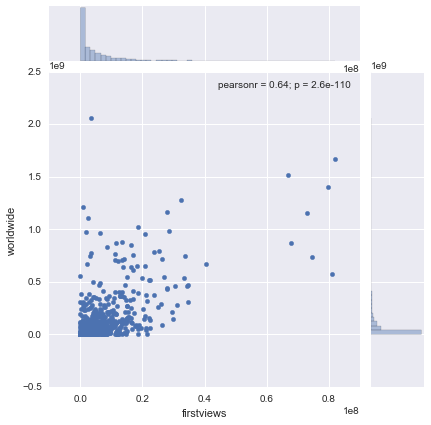

In [81]:
sns.jointplot(x='firstviews', y='worldwide', data=to_model)

ValueError: Using arbitrary long args with data is not supported due to ambiguity of arguments.
Use multiple plotting calls instead.

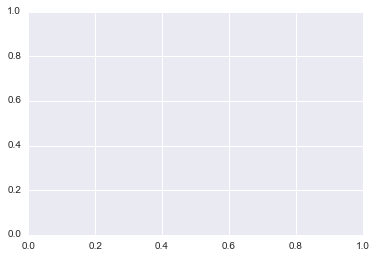

In [80]:
plt.plot(x='firstviews', y='domestic', data=to_model, kind = 'reg');
plt.title('Youtube views vs global')

In [ ]:
np.corrcoef(to_model['execprod'],to_model['producer'])